<h2>🚩Многоклассовая классификация</h2>

<b>✅Многоклассовая классификация</b> состоит в том, что у целевой переменной теперь более чем два класса(группы/метки). По сути эта все та же классификация, но только классов стало больше, чем два. Очень часто подобного рода задачи решаются при помощи нейросетей. Из классических моделей неплохо справляется случайный лес. В классическом машинном обучении выделяют следующие подходы к решению этой задачи:<br>
<ul>
    <li><b>One-vs-All (One-vs-Rest)</b> - Этот метод заключается в создании бинарных классификаторов для каждого класса. Например, если у нас есть 3 класса (A, B, C), то мы создаем три классификатора: один для класса A против (B+C), второй для класса B против (A+C) и третий для класса C против (A+B). Затем, чтобы сделать прогноз для новых данных, каждый классификатор предсказывает вероятность принадлежности объекта к своему классу, и выбирается класс с наибольшей вероятностью.</li>
    <li><b>Softmax-регрессия</b> - Это обобщение логистической регрессии на многоклассовый случай. Он использует функцию softmax для преобразования выходов модели в вероятности принадлежности к разным классам. Softmax-регрессия часто используется в нейронных сетях для многоклассовой классификации.(<a href="https://ru.wikipedia.org/wiki/%D0%9C%D0%BD%D0%BE%D0%B3%D0%BE%D0%BF%D0%B5%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D0%B0%D1%8F_%D0%BB%D0%BE%D0%B3%D0%B8%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%84%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D1%8F">подробнее тут</a>)</li>
    <li><b>Деревья принятия решений и случайный лес</b> - Эти алгоритмы могут быть применены к многоклассовой классификации. Деревья принятия решений разделяют данные на классы с помощью древовидной структуры, а случайный лес комбинирует несколько деревьев для улучшения точности.</li>
    <li><b>Нейронные сети</b> - Глубокие нейронные сети, такие как сверточные нейронные сети (CNN) и рекуррентные нейронные сети (RNN), часто используются для многоклассовой классификации изображений и текстовых данных. Эти сети могут изучать сложные зависимости между данными и классами.</li>
</ul>

<b>✅Метрики качества в задаче многоклассовой классификации</b><br>
В измерении качества в задаче многоклассовой классификации принято считать
метрики, характеризующие работу модели, исходя из усредненных по всем классам
значений TP, TN, FP и FN либо значения любой другой метрики.<br>
Существуют следующие подходы к усреднению:
<ul>
    <li><b>Микро-усреднение</b> - при микро-усреднении для каждого класса считаются TP, TN, FP и FN, после они суммируются по всей выборке и уже потом подставляются в формулу конкретной метрики.</li>
    <li><b>Макро-усреднение</b> - состоит в том, чтобы для каждого отдельного класса посчитать одну общую метрику(например recall), а затем сложить и усреднить полученные значения.</li>
</ul>

<h2>🚩Работа с признаками</h2>

<h3>🧑‍💻Кодирование категориальных признаков</h3>
Как известно, модели машинного обучения работают в основном с числовыми признаками. Но что же делать с категориальными признаками?

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
# create dataframe
df = pd.DataFrame({'Candidate_id': ['100', '53', '17', '35'],
                   'Tie_color': ['Red', 'Black', 'Purple','Black'],
                   'Family_status': ['Married','Married', 'Not married',
                                     'Married'],
                   'Level_of_education': ['School', 'College', 'University',
                                          'University'],
                   'Car_model': ['Toyota','Lexus','BMW','Toyota']})

# show data
df.head()

,Candidate_id,Tie_color,Family_status,Level_of_education,Car_model
0,100,Red,Married,School,Toyota
1,53,Black,Married,College,Lexus
2,17,Purple,Not married,University,BMW
3,35,Black,Married,University,Toyota


<b>✅Удаление признака.</b> Самое простое действие, которое вы можете сделать с категориальным признаком — удалить его. Это может оказаться очень хорошим решением, если вы уверены, что признак будет бесполезен для вашей модели. Однако, к сожалению или к счастью, вы вряд ли будете уверены в этом на 100%, пока не попробуете обучить свою модель с этим признаком.<br>
В нашем кейсе кажется, что признаки Candidate_id и Tie_color будут бесполезны для модели, так как:
<ul>
    <li>Candidate_id — уникальное id, такие признаки, как правило, не содержат полезную информацию. По ним лишь собирают наборы данных для дальнейшего обучения.</li>
    <li>Tie_color — вряд ли цвет галстука сильно влияет на работоспособность сотрудника, поэтому удалим и этот признак.</li>
</ul>

In [3]:
# delete features
df.drop(['Candidate_id', 'Tie_color'], axis=1, inplace=True)

<b>✅Бинаризация признака.</b> Да, это довольно банально, но проверьте, вдруг ваш признак имеет всего два значения. Если это так, то вам повезло — ваш признак бинарный, присвойте для одного значения 1, а для другого 0.<br>
Бинаризация признака хорошо подходит в случаях, когда признак выражен на естественном языке и имеет всего 2 категории. Например: мужчина / женщина, зеленый / красный.<br>
Family_status в данном случае может выступить как бинарный признак. Вы можете присвоить ему соответствующие значения так:

In [4]:
# transform data
df['Family_status_encoded'] = [1 if i == 'Married' else 0 for i in df['Family_status']]

✅<b>Ordinal Encoding</b> Данный метод полезен, если вы работаете с признаком, который имеет естественную порядковую связь. Например, уровень образования.<br>
Ordinal encoder присваивает значениям целые числа от 0 (0, 1, 2 и так далее).При этом имейте в виду, что лучше напрямую указать этот порядок.
Если мы просто возьмём и используем Ordinal encoder на колонке Level_of_education, то получим не тот результат, на который рассчитывали:

In [5]:
# import library
from sklearn.preprocessing import OrdinalEncoder

# define ordinal encoding
encoder = OrdinalEncoder()

# transform data
df['Level_of_education encoded'] = encoder.fit_transform(df[['Level_of_education']])

# show features
df[['Level_of_education','Level_of_education encoded']].head()

,Level_of_education,Level_of_education encoded
0,School,1.0
1,College,0.0
2,University,2.0
3,University,2.0


Как видно на картинке выше, School (школе) присвоилось значение 1, а College (колледжу) 0, что является логически неверным. Мы же хотим видеть следующее:<br>
0 - Школа, 1 - Колледж, 2- Университет.<br>
Чтобы избежать таких проблем, укажем признаки напрямую в OrdinalEncoder, по возрастанию значимости:<br>

In [6]:
# create ordered list of categories
education = ['School', 'College', 'University']

# define ordinal encoding
encoder = OrdinalEncoder(categories = [education])

# transform data
df['Level_of_education_encoded'] = encoder.fit_transform(df[['Level_of_education']])

# show features
df[['Level_of_education','Level_of_education_encoded']].head()

,Level_of_education,Level_of_education_encoded
0,School,0.0
1,College,1.0
2,University,2.0
3,University,2.0


✅<b>OneHot кодирование</b>. Его смыслс состоит в бинаризации категориального признака. One-Hot Encoding создает новые столбцы, в которых указывается:
<ul>
    <li>присутствует значение - 1;</li>
    <li>отсутствует - 0.</li> 
</ul>
Количество новых столбцов будет равно количеству уникальных значений признака. Также вместо One-Hot Encoding вы можете использовать pd.get_dummies(). Эти 2 метода очень похожи.<br>
Легче всего понять, как это работает, можно с помощью визуализации:<br>

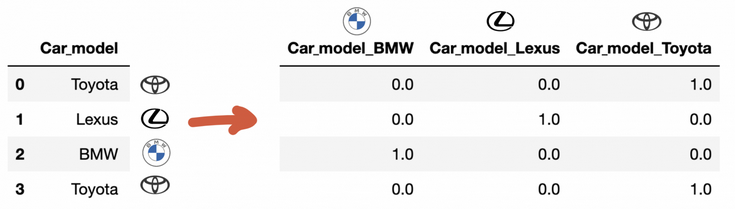<br>
На данной картинке слева показаны марки автомобилей, справа — то, как отработает One-Hot Encoder. Возьмем справа колонку Сar_model_BMW, в строках 0, 1, 3 стоит - 0, это значит, что люди в этих строках не являются владельцами BMW. В отличие от строки 2, там стоит - 1, следовательно, человек в строке 2 является владельцем BMW.<br>
В коде это выглядит следующим образом: 

In [7]:
# import library
from sklearn.preprocessing import OneHotEncoder

# define one hot encoding
# encoder = OneHotEncoder(sparse_output=False)
encoder = OneHotEncoder()

# transform data
onehot_columns = encoder.fit_transform(df[['Car_model']])

# concat dataframes
df = pd.concat([df, pd.DataFrame(onehot_columns)], axis=1)

# get new encoded column names
encoded_columns_name = encoder.get_feature_names_out(['Car_model'])

# rename columns after encoding
dict_column_names = {0: encoded_columns_name[0],
                     1: encoded_columns_name[1],
                     2: encoded_columns_name[2]}
df.rename(columns=dict_column_names,
          inplace=True)

# show features
# df[['Car_model','Car_model_BMW', 'Car_model_Lexus', 'Car_model_Toyota']].head()
df.head()

,Family_status,Level_of_education,Car_model,Family_status_encoded,Level_of_education encoded,Level_of_education_encoded,Car_model_BMW
0,Married,School,Toyota,1,1.0,0.0,"(0, 2)\t1.0"
1,Married,College,Lexus,1,0.0,1.0,"(0, 1)\t1.0"
2,Not married,University,BMW,0,2.0,2.0,"(0, 0)\t1.0"
3,Married,University,Toyota,1,2.0,2.0,"(0, 2)\t1.0"


Важный нюанс! При таком подходе возникает мультиколлинеарность. Это может плохо сказаться на качестве вашей модели, особенно если вы используете линейную регрессию. Чтобы решить эту проблему, достаточно просто удалить первый закодированный столбец, в нашем случае — это Car_model_BMW. Такой процесс вам следует повторить для каждого признака, который вы преобразовали. Для этого вы можете просто добавить аргумент drop='first' в функцию OneHotEncoder():<br>
`# better way to define one hot encoding`<br>
`encoder = OneHotEncoder(sparse_output=False, drop='first')`

✅<b>Mean-Target Encoding</b>. Идея mean-target encoding(счетчика) состоит в том, чтобы кодировать каждое
уникальное значение категориального признака долей объектов положительного
класса, имеющих данный признак. То есть по сути нам важны не сами категории, а
значения целевой переменной, которые имеют объекты данной категории. Формула
для расчета выглядит так:<br>
$g_j(x, X)=\frac{\sum_{i=1}^{n}[f(x)=f_j(x_i)][y_i=+1]}{\sum_{i=1}^{n}[f(x)=f_j(x_i)]}$<br>
Но есть нюанс. Подобный подход может привести к переобучению. Причина этому - числовые значения для кодирования признаков выбираются исходя из данных конкретной выборки. То есть уже на этом моменте модель немного сбавляет в своих обобщающих возможностях. Для решения данной
проблемы к закодированным числовым значениям признаков обычно добавляется шум - некое случайное число. После добавления шума значения признаков также сглаживаются. Формула для сглаживания(здесь global_mean - среднее число объектов
положительного класса по всей выборке):<br>
$g_j(x, X)=\frac{\sum_{i=1}^{n}[f(x)=f_j(x_i)][y_i=+1] + C \times global_mean}{\sum_{i=1}^{n}[f(x)=f_j(x_i)] + C}$

<h3>🔎Отбор признаков</h3>

При отборе признаков для линейной модели можно использовать один из следующих методов:<br>методы фильтрации и методы обертки.
<ul>
<li><b>Встроенные методы</b> - суть встроенных методов состоит в том, что мы обучаем линейную регрессию с некоторым набором признаков, смотрим, какие веса регрессия назначила для каждого признака(как известно, регрессия назначает веса признакам исходя из их вклада в значение целевой переменной) и уже по ним отбираем лучшие.</li>
<li><b>Методы фильтраци</b> - состоят в том, что к каждому признаку мы применяем некую функцию-фильтр. На основании значений этой функции мы и отбираем признаки. Пример такой функции - t-критерий:<br>
$t(j)=\frac{|\mu_{+}-\mu_{-}|}{\sqrt{\frac{\sigma_{+}^2}{n_{+}} + \frac{\sigma_{-}^2}{n_{-}}}}$<br>
Где:<br>
<ul>
    <li>$\mu_+$, $\mu_-$ - средние значения признака $j$ у отрицательных и положительных таргетов</li>
    <li>$\sigma_{+}^2$, $\sigma_{-}^2$ - дисперсии значения $j$-го признака у отрицательных и положительных таргетов</li>
    <li>$n_+$, $n_-$ - объемы выборок</li>
</ul>
<li><b>Методы обертки</b> - состоят в отборе признаков посредствам их последовательного исключения/добавления из обучающей выборки. На каждой такой итерации модель обучается на данных с новым набором признаков.</li>
<li><b>L1-регуляризация</b> - также можно использовать L1 регуляризацию - она склонна к отбору признаков.</li>
</ul>

<h2>🌳Решающие деревья</h2>

<b>✅Решающее дерево</b> - это бинарное дерево, в каждой вершине которого, за исключением листовых, задан некоторый предикат, а в каждом листе находится прогноз. Дерево, в отличии от линейных моделей, способно восстановить зависимости любой сложности,
а не только лишь линейной. Обычно сложность зависимостей, которые способна восстановить модель, ограничивается сложностью признаков. С деревом же это не так.

✅Вкратце жадный алгоритм построения дерева можно описать так:
<ol>
    <li>Запускаем рекурсивную функцию, которая смотрит, не выполнился ли критерий останова(им может быть достигнутая максимальная глубина дерева, достигнутое максимальное число листьев, незначительное уменьшение энтропии или достигнутое минимальное число объектов в вершине, необходимое для превращения ее в лист).</li>
    <li>Выбираем лучший предикат, фиксируем его, и относительно него делим выборку на две части.</li>
    <li>Так продолжаем до выхода из функции.</li>
</ol>
Перебор всех предикатов - очень затратный процесс, поэтому мы на каждом шаге выбираем и фиксируем лучший(исходя из значений критерия информативности(энтропия Шэнона или критерий Джини)). Именно по этому этот алгоритм и называется жадным.

<b>✅С помощью бинарного решающего дерева можно достичь нулевой ошибки на обучающей выборке без повторяющихся объектов.</b><br>
Дело в том, что бинарное дерево в каждой вершине содержит предикат, который и разделяет объекты на два типа относительно этого самого предиката. Так как это дерево, то мы можем выбирать предикат до тех пор, пока при их помощи не разделим безошибочно все объекты конкретной выборки. От этого дерево станет очень глубоким и переобучится. То есть достижение нулевой ошибки на обучающей выборке вытекает
из свойства дерева. При обучении дерева мы должны стремиться приблизить его на обучающей выборке, сохраняя его как можно проще, чтобы не потерять егообобщающую способность. В таком случае важно не иметь повторяющихся объектов с разным значением целевой переменной, ибо в таком случае мы не сможем построить однозначный путь к листьям для каждого объекта.

<b>✅Пример построение решающего дерева классификации:</b>

In [11]:
from sklearn.datasets import load_iris
from sklearn import tree
import matplotlib.pyplot as plt

iris = load_iris()
X, y = iris.data, iris.target
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

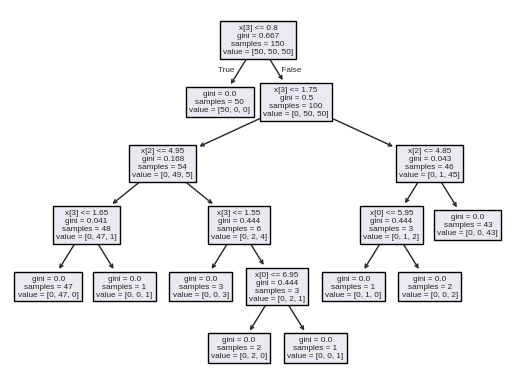

In [15]:
tree.plot_tree(clf)
plt.show()

<b>✅Пример построение решающего дерева регрессии:</b>

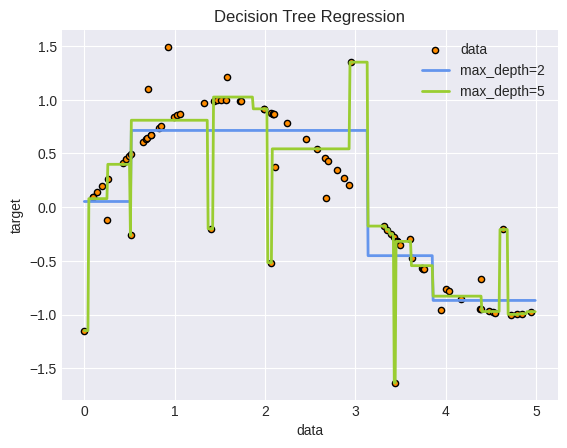

In [16]:
import numpy as np

from sklearn.tree import DecisionTreeRegressor

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue", label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

<b>✅Критерий хаотичности(Энтропия)</b>

Критерий хаотичности, или энтропия, является мерой беспорядка или , как ещё
говорят, мерой неопределенности. Считается он по формуле:
$H(p_1,...,p_n)=-\sum_{i=1}^{n}p_i log(p_i)$<br>
Здесь мы имеем n экспериментов, каждый со своей вероятностью наступления. Чтобы посчитать энтропию в таком случае мы должны просуммировать произведение вероятности наступления события на натуральный логарифм от вероятности этого события. Если вспомнить, что вероятность распределена на отрезке от 0 до 1 и то, что логарифм от аргумента, меньшего 1, отрицателен, то станет понятно, зачем перед суммой минус.<br>
При выборе предиката он используется так - считается энтропия по разбиению по всем рассматриваемым предикатам(признак + его числовое значение(порог)). После разбиения из рассматриваемых предикатов выбирается тот, у которого энтропия меньше(логично, так как ). Также важно, чтобы при выбранном предикате энтропия до разбиения была больше, чем энтропия после разбиения. То есть ищем такой признак j и порог t, при котором энтропия в нашей вершине максимально снизится. По факту:<br>
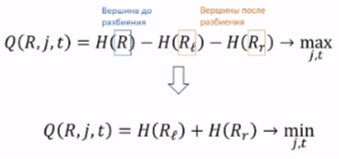<br>
Но это не совсем корректно, так как мы никак не регулируем вклад каждого класса:<br>
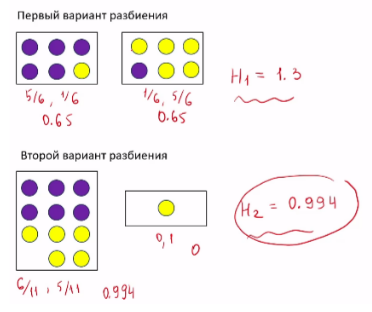<br>
Доработаем критерий:<br>
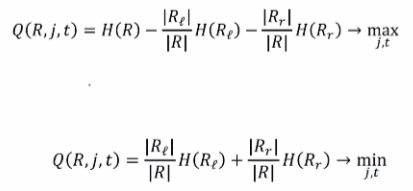<br>
В новом критерии мы домножаем хаотичность на долю объектов, который попали в эту вершину. То есть, по сути, регулируем вклад каждого класса.

<b>✅Критерий Джини</b><br>
Отличается от энтропии только подсчетом:<br>
$H(p_1,...,p_k)=\sum_{i=1}^{k}p_i(1-p_i)$<br>
Тут $p_i$, как и в энтропии - доля объектов каждого конкретного класса(в бинарной классификации положительного или отрицательного). Критерий Джини быстрее и проще в подсчете. С критерием энтропии они имеют одинаковый вид:<br>
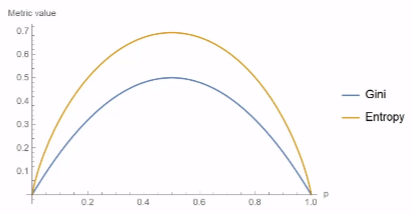

<b>✅Подсчет предсказаний</b><br>
Для подсчета предсказаний в задаче регрессии для каждого листа просто считаем среднее значение объектов в нем. В задаче же классификации считаем в листе для каждого класса его вероятность попадания в этот лист, либо просто возвращаем самый часто встречающийся объект в листе.

<b>✅Связь линейных моделей и решающих деревьев</b><br>
Линейные модели быстро обучаются и могут работать с большим числом признаков, но при этом и предсказывать они могут только линейные зависимости, а решающие деревья могут восстановить практически любую сложность. Линейные модели и деревья похожи прогнозами - произведением весов на признаки.